In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [2]:
# Load the dataset
columns = ['Wifi1', 'Wifi2', 'Wifi3', 'Wifi4', 'Wifi5', 'Wifi6', 'Wifi7', 'Room']
data = pd.read_csv('wifi_localization.txt', sep='\t', header=None, names=columns)

# Check for any inconsistencies or missing values
inconsistencies_report = data.describe(include='all').T
missing_values_report = data.isnull().sum()

# Output the report for analysis
#inconsistencies_report, missing_values_report #un-comment if needed

1. **Inconsistencies Report**:
   - Each wifi signal strength feature (Wifi1 to Wifi7) has 2000 entries.
   - Signal strengths vary across different wifi devices, with means ranging from -52.33 (Wifi1) to -81.73 (Wifi7).
   - Standard deviations indicate varying degrees of spread in signal strengths across the wifi features.
   - The 'Room' column, which is our target variable, is evenly distributed among four categories (1 to 4).
2. **Missing Values**:
   - There are no missing values in the dataset, as each column has 0 missing entries.
3. **Statistical Analysis**:
   - The means of wifi signal strengths vary significantly, ranging from -52.33 (Wifi1) to -81.73 (Wifi7).
   - Standard deviations suggest varying spreads in signal strengths, with Wifi6 and Wifi7 being more consistent compared to others.
   - The minimum and maximum values indicate a wide range of signal strengths captured by different wifi devices.

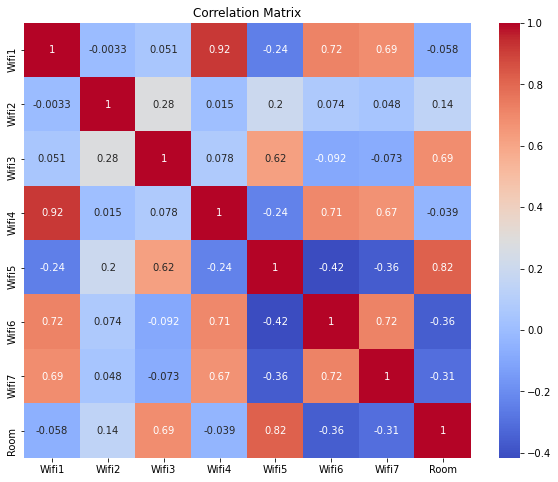

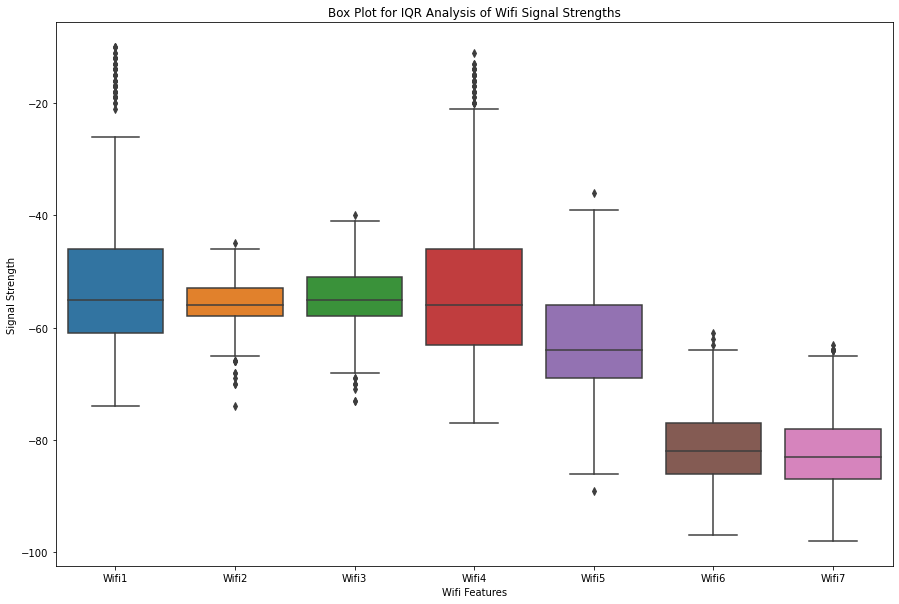

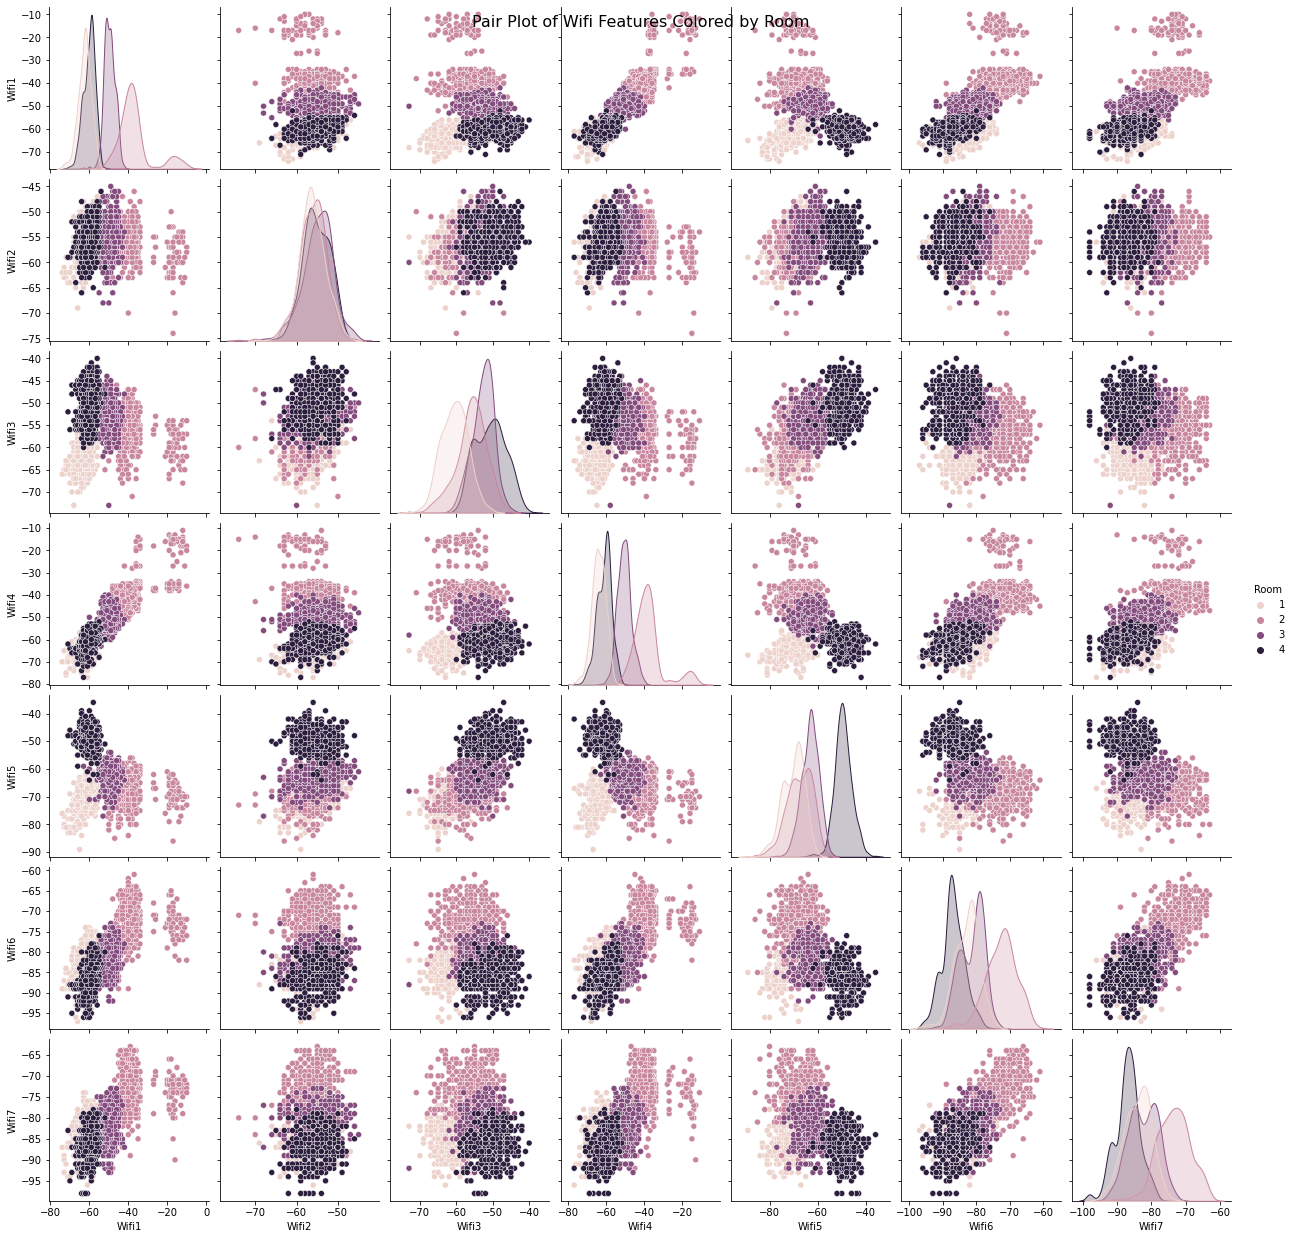

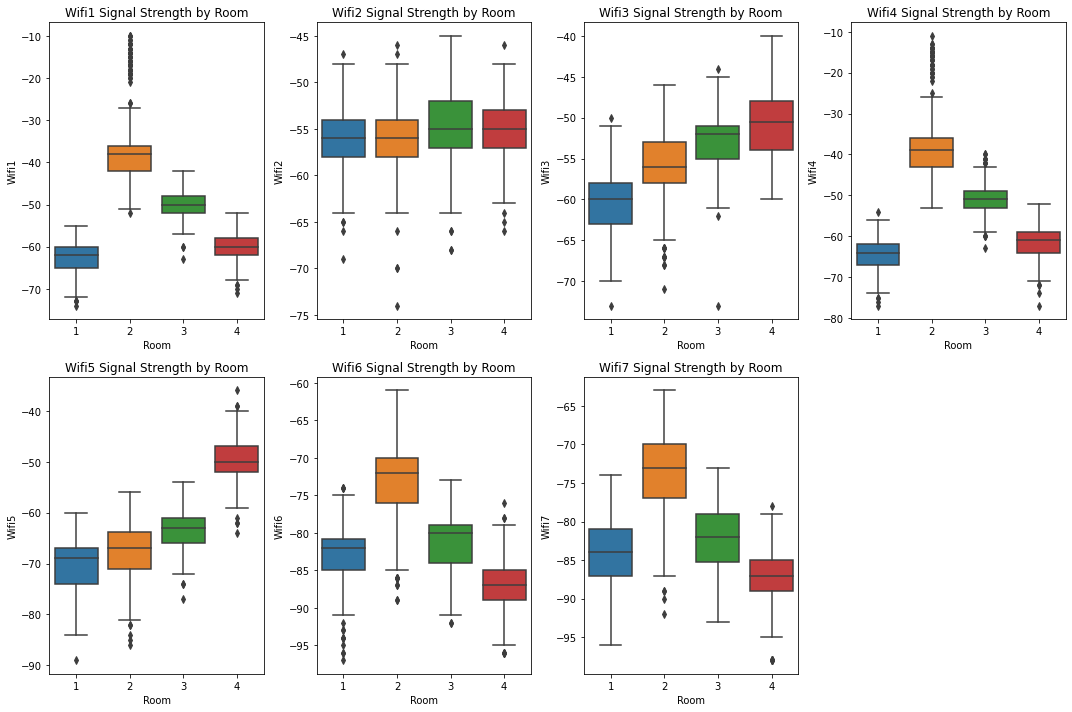

In [3]:
# Plotting correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Box plots for IQR analysis
plt.figure(figsize=(15, 10))
# Melting the DataFrame to long format for Seaborn
melted_data = pd.melt(data.iloc[:, :-1])
sns.boxplot(x='variable', y='value', data=melted_data)
plt.title('Box Plot for IQR Analysis of Wifi Signal Strengths')
plt.xlabel('Wifi Features')
plt.ylabel('Signal Strength')
plt.show()

# Pair plot to visualize pairwise relationships between features
sns.pairplot(data, hue='Room')
plt.suptitle('Pair Plot of Wifi Features Colored by Room', size=16)
plt.show()

# Box plots for each feature by room
plt.figure(figsize=(15, 10))
for i in range(1, 8):
    plt.subplot(2, 4, i)
    sns.boxplot(x='Room', y=f'Wifi{i}', data=data)
    plt.title(f'Wifi{i} Signal Strength by Room')
plt.tight_layout()
plt.show()

The visualizations provide the following insights:
1. **Correlation Matrix**:
   - There is some level of correlation between certain wifi features, but none of them are highly correlated.
   - This suggests that each wifi signal strength might be providing unique information about the location.

2. **Box Plot for IQR Analysis**:
   - The box plots reveal varying degrees of spread and outliers in the signal strengths of different wifi devices.
   - Wifi6 and Wifi7 show less variability compared to others.

2. **Pair Plots**:
   - Shows the pairwise relationships between different wifi signal strengths.
   - Different colors representing different rooms help to identify how signal strengths vary across rooms.

2. **Box Plots**:
   - Each plot shows the distribution of signal strengths for a particular wifi feature across the different rooms.
   - There are noticeable differences in the distributions of signal strengths across rooms, which is good for classification.

These visualizations confirm that the signal strengths of different wifi devices vary significantly across different rooms, suggesting that these features are likely good predictors for the room classification. This understanding will be beneficial for feature selection and model training.

In [4]:
# Splitting the data into training and testing sets
X = data.drop('Room', axis=1)
y = data['Room']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shape of the splits for verification
#X_train.shape, X_test.shape, y_train.shape, y_test.shape #uncomment if needed

I'm going to be training supervised models since unsupervised methods are generally not preferred for classification tasks where the target variable is known and labeled. 

Given the EDA findings, here are classification models to train:

   - **Decision Trees (dt)**: Good for interpretability but can be prone to overfitting.
   - **Random Forest (rf)**: An ensemble method that can handle outliers and is less likely to overfit compared to a single decision tree.
   - **Random Forest With Important Features (rf_imp)**: I'm going to use a feature importance analysis and use those important features to train an extra model for random forest
   - **Support Vector Machines (svm)**: Effective in high-dimensional spaces and with different kernel functions, it can capture complex relationships.
   - **K-Nearest Neighbors (knn)**: Simple and effective, though it might be sensitive to the scale of data and outliers.
   - **Gradient Boosting (gb)**: Strong predictive power but requires careful tuning to avoid overfitting.
   - **Gradient Boosting With Important Features (gb_imp)**: I'm going to use a feature importance analysis and use those important features to train an extra model for gradient boosting.

In [5]:
# Training Random Forest and Gradient Boosting for feature importance analysis
rf_imp = RandomForestClassifier(random_state=42)
gb_imp = GradientBoostingClassifier(random_state=42)

# Fitting the models on the entire dataset (as we are only interested in feature importance)
rf_imp.fit(X, y)
gb_imp.fit(X, y)

# Extracting feature importances
rf_feature_importances = rf_imp.feature_importances_
gb_feature_importances = gb_imp.feature_importances_

# Creating a DataFrame to display feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Random Forest Importance': rf_feature_importances,
    'Gradient Boosting Importance': gb_feature_importances
}).sort_values(by='Random Forest Importance', ascending=False)

# Output the report for analysis
#feature_importances #un-comment if needed

Wifi1 and Wifi5 are crucial features for predicting the room based on wifi signal strengths.

In [6]:
# Training models with full features
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Support Vector Machine
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Training rf_imp and gb_imp models with only the most important features (Wifi1 and Wifi5)
X_important = X[['Wifi1', 'Wifi5']]
X_train_imp, X_test_imp, _, _ = train_test_split(X_important, y, test_size=0.2, random_state=42)

rf_imp.fit(X_train_imp, y_train)
gb_imp.fit(X_train_imp, y_train)

GradientBoostingClassifier(random_state=42)

In [7]:
# Function to evaluate a model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    return accuracy, precision, recall, f1

# Evaluating all models
models = {
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'SVM': svm_model,
    'KNN': knn_model,
    'Gradient Boosting': gb_model,
    'RF with Important Features': rf_imp,
    'GB with Important Features': gb_imp
}

evaluation_results = {}
for name, model in models.items():
    if name in ['RF with Important Features', 'GB with Important Features']:
        evaluation_results[name] = evaluate_model(model, X_test_imp, y_test)
    else:
        evaluation_results[name] = evaluate_model(model, X_test, y_test)

# Creating a DataFrame to display the results
evaluation_df = pd.DataFrame(evaluation_results, index=['Accuracy', 'Precision', 'Recall', 'F1 Score']).T

# Sorting the DataFrame by F1 Score
evaluation_df.sort_values(by='F1 Score', ascending=False, inplace=True)

evaluation_df

,Accuracy,Precision,Recall,F1 Score
Decision Tree,0.9825,0.981696,0.981789,0.981418
KNN,0.9825,0.981662,0.981998,0.981299
Gradient Boosting,0.9825,0.981285,0.981789,0.981295
Random Forest,0.9825,0.981132,0.981579,0.981287
SVM,0.9800,0.979278,0.979157,0.978771
RF with Important Features,0.9650,0.962711,0.962967,0.962480
GB with Important Features,0.9650,0.962711,0.962967,0.962480


I'm not going to be plotting the evaluation metrics, since nearly all of the models we have trained performed exceptionally well with close scores to one another.

The **Decision Tree model** has showcased exceptional accuracy in our analysis of predicting room locations based on wifi signal strengths, with an impressive **accuracy of 98.25%**. This means it correctly identified the room in 98.25% of the cases based on the wifi data. Its **Precision of 98.17%** implies that when it predicts a room, there is a 98.17% chance that the prediction is accurate. The **Recall of 98.18%** indicates that it successfully identifies 98.18% of all actual instances of the rooms, ensuring minimal misses in correct room classifications. The **F1 Score of 98.14%** reflects a balanced measure of precision and recall, demonstrating both the model's accuracy and consistency.

In comparison, other models like K-Nearest Neighbors (KNN), Gradient Boosting, and Random Forest also performed with nearly identical high accuracy and precision, making them equally viable choices depending on specific application needs.

However, the simplicity and interpretability of the Decision Tree model make it particularly appealing, especially in scenarios where understanding the decision-making process is crucial. Its ability to provide clear and understandable rules for room prediction makes it an excellent tool for applications such as indoor navigation systems, smart building management, and enhanced location-based services, where accurate room-level prediction is essential and explainability is valued.